# Guided Capstone Step 6 Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [188]:
#Load Python Packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import empiricaldist as ed
from scipy import stats
from scipy.stats import norm
from math import sqrt
import sklearn 
from sklearn import datasets, linear_model, metrics
from sklearn.preprocessing import MaxAbsScaler, PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.metrics import explained_variance_score,mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


# Find directory
%matplotlib inline
os.getcwd()
basepath = os.getcwd()
print(basepath)

# load csv data
file ='step3_output.csv'
sub_file = 'data'
file_name_path = os.path.join(basepath, sub_file, file)
ski_data= pd.read_csv(file_name_path)



C:\Users\Tiki\Documents\Sprinboard2\Guided_Capstone


## Fit Models with Training Data Set

**<font color='teal'> Using sklearn fit the model you cose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [189]:
#drop duplicate columns
ski_data = ski_data.T.drop_duplicates().T

#just for adult weekend
response=['AdultWeekend']

#create explain variable set
explain =list(set(ski_data.columns)-set(response))
ski_data_resp=ski_data[response].astype(float)
ski_data_trial_presc=ski_data[explain]

#Do Not need state or name
#drop name
name_popped = ski_data_trial_presc.pop('Name')

#drop state
state_popped = ski_data_trial_presc.pop('state')

ski_data_trial_presc = ski_data_trial_presc.astype(float)


#make copy of data so we can transform it
ski_data_trial = ski_data_trial_presc.copy()

#use max absolute as scaler

scaler = MaxAbsScaler().fit(ski_data_trial.values)

#transform data
z = scaler.transform(ski_data_trial.values)

#turn into panda data frame with column
ski_data_trial = pd.DataFrame(data= z,  columns=ski_data_trial_presc.columns) 
    
#drop duplicate columns
ski_data_trial = ski_data_trial.T.drop_duplicates().T

#split the data
X_train, X_test, y_train, y_test = train_test_split(ski_data_trial , ski_data_resp, test_size=0.25, random_state=0)


#Create Model

#Choose Linear Model
lm = linear_model.LinearRegression()
lin_model = lm.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)

#Create Coefficent Table
lin_model_coef = {}
for idx, col_name in enumerate(X_train.columns):
    lin_model_coef[col_name] = lm.coef_[0][idx]
coef_table =pd.DataFrame(lin_model_coef.items(), columns=['variable', 'coefficent'])



#Find the R scores
lin_model_expl_var = explained_variance_score(y_test, y_pred)
lin_model_me = mean_absolute_error(y_test, y_pred)
lin_model_rsq = r2_score(y_test, y_pred)




print('The Rsq of the linear model = {} and the Mean Absolute Error = {}'.format(lin_model_rsq, lin_model_me))
print(coef_table)


The Rsq of the linear model = 0.8007138670334504 and the Mean Absolute Error = 5.925269154080263
             variable  coefficent
0              triple    1.167150
1                Runs    8.783684
2              double    3.090396
3       vertical_drop   10.763967
4           fastSixes   -1.870310
5      Snow Making_ac    0.413988
6                quad    4.636164
7        TerrainParks    0.724867
8        AdultWeekday   62.253933
9   projectedDaysOpen  -13.540254
10  SkiableTerrain_ac   -8.119628
11     NightSkiing_ac    0.933846
12          yearsOpen    0.530120
13       total_chairs    1.113902
14              trams   -1.784968
15      LongestRun_mi   -2.936402
16        summit_elev  -12.190315
17          fastQuads    4.358319
18   daysOpenLastYear   12.425208
19           clusters   -6.711995
20            surface   -4.462058
21    averageSnowfall   -6.594098


In [190]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

X = sm.add_constant(X_train.astype(float))
y = y_train.astype(float)
m1 = sm.OLS(y, X)
model= m1.fit() 
    
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekend   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     26.25
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           4.78e-36
Time:                        17:51:45   Log-Likelihood:                -488.13
No. Observations:                 147   AIC:                             1020.
Df Residuals:                     125   BIC:                             1086.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                26.1021      5.632      4.635      0.000      14.955      37.249
triple                1.1672      3.545      0.329      0.743      -5.849       8.183
Runs                  8.7837      7.315      1.201      0.232      -5.695      23.262
double                3.0904      2.612      1.183      0.239      -2.078       8.259
vertical_drop        10.7640      5.414      1.988      0.049       0.050      21.478
fastSixes            -1.8703      4.805     -0.389      0.698     -11.380       7.640
Snow Making_ac        0.4140      7.680      0.054      0.957     -14.786      15.614
quad                  4.6362      2.007      2.310      0.023       0.665       8.608
TerrainParks          0.7249      2.934      0.247      0.805      -5.082       6.532
AdultWeekday         62.2539      5.275     11.802      0.000      51.814      72.693
projectedDaysOpen   -13.5403      9.587     -1.412      0.160     -32.514       5.434
SkiableTerrain_ac    -8.1196      7.264     -1.118      0.266     -22.497       6.257
NightSkiing_ac        0.9338      7.896      0.118      0.906     -14.693      16.561
yearsOpen             0.5301      4.116      0.129      0.898      -7.616       8.677
total_chairs          1.1139      1.968      0.566      0.572      -2.780       5.008
trams                -1.7850      4.054     -0.440      0.661      -9.809       6.239
LongestRun_mi        -2.9364      4.665     -0.629      0.530     -12.169       6.297
summit_elev         -12.1903      4.174     -2.920      0.004     -20.451      -3.929
fastQuads             4.3583      3.325      1.311      0.192      -2.222      10.939
daysOpenLastYear     12.4252      7.460      1.666      0.098      -2.338      27.189
clusters             -6.7120      2.244     -2.991      0.003     -11.153      -2.271
surface              -4.4621      2.958     -1.509      0.134     -10.316       1.392
averageSnowfall      -6.5941      4.732     -1.394      0.166     -15.959       2.771
==============================================================================
Omnibus:                        3.883   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                4.528
Skew:                           0.099   Prob(JB):                        0.104
Kurtosis:                       3.837   Cond. No.                     3.12e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.54e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [191]:
file2 = 'updated_ski_data.csv'
file_name_path2 = os.path.join(basepath, file2)
ski_data_raw= pd.read_csv(file_name_path2)
Big_raw = ski_data_raw[ski_data_raw['Name'].str.contains('Big Mountain')]
#print(Big)
#This does not exist....
#Trying S_Elevation
Big_raw = ski_data_raw[ski_data_raw.summit_elev ==6817]
print(Big_raw.T)
#correct
Big = ski_data[ski_data.summit_elev ==6817]
print(Big.T)



                                         151
Name               Whitefish Mountain Resort
Region                               Montana
state                                Montana
summit_elev                             6817
vertical_drop                           2353
base_elev                               4464
trams                                      0
fastEight                                  0
fastSixes                                  0
fastQuads                                  3
quad                                       2
triple                                     6
double                                     0
surface                                    3
total_chairs                              14
Runs                                     105
TerrainParks                               4
LongestRun_mi                            3.3
SkiableTerrain_ac                       3000
Snow Making_ac                           600
daysOpenLastYear                         123
yearsOpen 

BigMountain = ski_data[ski_data['Name'].str.contains('Big Mountain')]
**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [192]:
#get columns for explanatory variabes
expl_var = ski_data_trial.columns

#Get explanatory columns from row Big
Big_expl_variables = Big[expl_var]

#scale expalanatory data
z = scaler.transform(Big_expl_variables)
Big_expl_variables_scaled = pd.DataFrame(data= z,  columns=expl_var)


#print('When state dummy variables al = {} and the Mean Absolute Error = {}'.format(lin_model3_Rsq, lin_model3_me))


**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [193]:
#Big_Model_predict
Price_B_predict_arr = lin_model.predict(Big_expl_variables_scaled)
Price_B_predict = round(Price_B_predict_arr.item(),2)

print('The predict weekend price = ${}'.format(Price_B_predict))


The predict weekend price = $85.32


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [194]:
Price_B_actual = round(Big['AdultWeekend'].values.item(),2)
print('The actual weekend price = ${}'.format(Price_B_actual))



The actual weekend price = $81.0


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

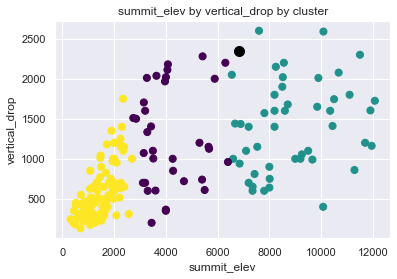

In [195]:
df = ski_data_trial_presc
df['AdultWeekend'] = ski_data_resp
df['Competitors']= False
df.loc[df.summit_elev ==6817,'Competitors']= True
#df.loc['c','Competitors']= 'US'

ac= Big

#ac = ski_data_trial
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

NameError: name 'polyfit' is not defined

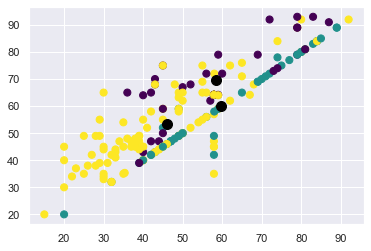

In [196]:
loc_pwknd = df.columns.get_loc('AdultWeekend')
loc_pwk = df.columns.get_loc('AdultWeekday')

#ac = ski_data_trial
#plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='black', s=100)
plt.scatter(df['AdultWeekday'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(kmeans.cluster_centers_[:,loc_pwk] ,kmeans.cluster_centers_[:,loc_pwknd], color='black', s=100)

b, m = polyfit(df['AdultWeekday'], df['AdultWeekend'], 1)


plt.xlabel('AdultWeekday')
plt.ylabel('AdultWeekend')
plt.title('Weekday Price by Weekend Price by cluster')
plt.savefig('figures/fig2.png',bbox_inches='tight')




In [ ]:
g=sns.lmplot(x='AdultWeekday', y='AdultWeekend', data=df)
g.fig.suptitle("Adult Weekday vs Weekend Price")
plt.show()

In [ ]:
#summit
plt.scatter(df['summit_elev'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['summit_elev'], ac['AdultWeekend'], c='black', s=100)

plt.xlabel('summit_elev')
plt.ylabel('Adult Weekend price')
plt.title('summit_elev by Adult Weekend price by cluster')
plt.savefig('figures/fig3.png',bbox_inches='tight')

In [ ]:

sns.set(color_codes=True)

g=sns.lmplot(x='summit_elev', y='AdultWeekend', hue= 'clusters', data=df)
g.fig.suptitle("Summit Elevation vs Weekend Price")
plt.show()
plt.savefig('figures/fig4.png',bbox_inches='tight')

In [ ]:
#Days open
loc_x = df.columns.get_loc('daysOpenLastYear')
plt.scatter(df['daysOpenLastYear'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['daysOpenLastYear'], ac['AdultWeekend'], c='black', s=100)
plt.xlabel('Days Open Last Year')
plt.ylabel('Adult Weekend price')
plt.title('Days Open Last Year by Adult Weekend price by cluster')
plt.savefig('figures/fig5.png',bbox_inches='tight')

In [ ]:
g=sns.lmplot(x='daysOpenLastYear', y='AdultWeekend', hue='clusters', data=df)
g.fig.suptitle("Days Open Last Year vs Weekend Price")
plt.show()
plt.savefig('figures/fig6.png',bbox_inches='tight')

In [ ]:
g=sns.lmplot(x='Runs', y='AdultWeekend', hue='clusters',  data=df)
g.fig.suptitle("Number of Runs vs Weekend Price")
plt.show()
plt.savefig('figures/fig7.png',bbox_inches='tight')

In [ ]:
#Runs

plt.scatter(df['Runs'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['Runs'], ac['AdultWeekend'], c='black', s=100)
plt.xlabel('Runs')
plt.ylabel('Adult Weekend price')
plt.title('Runs by Adult Weekend price by cluster')
plt.savefig('figures/fig8.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and python scripts you have created and clean them n=up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model out a callable object using pickle for future use in a data pipeline.**<font color='teal'> Run the example code below to save out your callable model, notice we save it in the models folder we created in our previous guided capstone.</font>** 

In [ ]:
#import pickle
#s = pickle.dumps(model)
#from joblib import dump, load
#dump(model, 'models/regression_model_adultweekend.joblib') 

## Finalize Documentation

For model documentation we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file then upload it to your github repository.</font>** 

In [ ]:

#Create Metrics table
lin_model_metrics_dict= {}
lin_model_metrics_dict['explained_variance'] = lin_model_expl_var 
lin_model_metrics_dict['mean_absolute_error'] = lin_model_me
lin_model_metrics_dict['R2'] = lin_model_rsq
lin_model_metrics_table =pd.DataFrame(lin_model_metrics_dict.items(), columns=['variable', 'value'])
coef_table_2 = coef_table.copy()

coef_table_2= coef_table_2.rename(columns={'coefficent': 'value'})

pd.concat([coef_table_2, lin_model_metrics_table], keys=['coefficent', 'metrics'])
